# Assignment - Image Classification with CNNs
![CIFAR10](https://miro.medium.com/max/964/1*syyml8q8s1Yt-iEea5m1Ag.png)

[CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html) is a small toy data set for image classifaction. 

* It has 60k images from ten diffenrent classes (like car, airplane, horse,..)
* The RGB images are of size 32x32 pixels  

In [1]:
!nvidia-smi

Wed May 12 12:18:48 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#import needed libs
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

#some vars to controll the training -> use them in your code
batch_size = 32
num_classes = 10 #fixed!
epochs = 10

# Get the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Task:
* visualize some sample images from different classes
* build and train the ***AlexNet*** CNN architecture from the lecture, use the following Keras layers:
    * overview: https://keras.io/api/layers/
    * 2d convolution: https://keras.io/api/layers/convolution_layers/convolution2d/
    * Fully Connected (=Matrix Multiplication MLP): https://keras.io/api/layers/core_layers/dense/
    * Pooling: https://keras.io/api/layers/pooling_layers/max_pooling2d/   
* use 'relu' functions for the non-linear activation -> https://keras.io/api/layers/activation_layers/relu/
* optimize the learning hyper-paramters to get the best  test accuracy

## Assignment

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras


iterations:  16


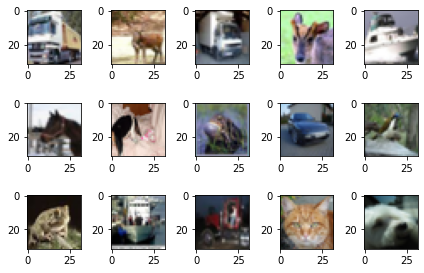

In [4]:
j = 1
rows = 3
columns = 5
stepsize = 1000

for i in range(1,(rows*columns*stepsize),stepsize):
    plt.subplot(rows,columns,j)
    plt.imshow(x_train[i])
    j += 1

plt.tight_layout()
print('iterations: ', j)

In [5]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import CenterCrop
from tensorflow.keras.layers.experimental.preprocessing import Rescaling


In [6]:
# Get the data as Numpy arrays
#(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Build a simple model
inputs = keras.Input(shape=(32, 32, 3))
l1 = Rescaling(scale=1.0 / 255)(inputs)
#l1 = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
#l2 = layers.Flatten()(l1)

l3 = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(l1)
l4 = layers.MaxPooling2D(pool_size=(3, 3))(l3)
l5 = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(l4)
l6 = layers.MaxPooling2D(pool_size=(3, 3))(l5)
l7 = layers.Conv2D(filters=32, kernel_size=(2, 2), activation="relu")(l6)
l8 = layers.MaxPooling2D(pool_size=(1, 1))(l7)


# Apply global average pooling to get flat feature vectors
l9 = layers.GlobalAveragePooling2D()(l8)

# Add a dense classifier on top
units = 10
outputs = layers.Dense(units, activation="softmax")(l9)
model = keras.Model(inputs, outputs)
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 32)          4128  

In [7]:
# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
#model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

# Train the model for 1 epoch from Numpy data
batch_size = 64
epochs = 150
print("-----Fit on NumPy data-----")
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

# Train the model for 1 epoch using a dataset
#dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
#print("\n-----Fit on Dataset-----")
#history = model.fit(dataset, epochs=epochs)

-----Fit on NumPy data-----
Epoch 1/150
782/782 [==============================] - 34s 6ms/step - loss: 1.9862 - accuracy: 0.2644
Epoch 2/150
782/782 [==============================] - 5s 6ms/step - loss: 1.5362 - accuracy: 0.4376
Epoch 3/150
782/782 [==============================] - 5s 6ms/step - loss: 1.4366 - accuracy: 0.4775
Epoch 4/150
782/782 [==============================] - 5s 6ms/step - loss: 1.3544 - accuracy: 0.5164
Epoch 5/150
782/782 [==============================] - 5s 6ms/step - loss: 1.3054 - accuracy: 0.5361
Epoch 6/150
782/782 [==============================] - 5s 6ms/step - loss: 1.2655 - accuracy: 0.5535
Epoch 7/150
782/782 [==============================] - 5s 6ms/step - loss: 1.2180 - accuracy: 0.5692
Epoch 8/150
782/782 [==============================] - 5s 6ms/step - loss: 1.1955 - accuracy: 0.5816
Epoch 9/150
782/782 [==============================] - 5s 6ms/step - loss: 1.1585 - accuracy: 0.5891
Epoch 10/150
782/782 [==============================] - 5s 6ms

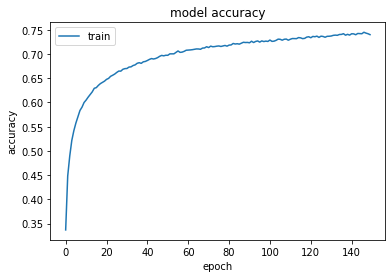

In [8]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

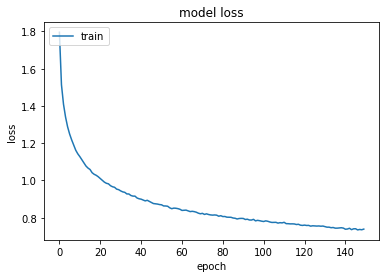

In [9]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()